In [1]:
import os
import glob
import numpy as np
import dask
import dask.array as da
from PIL import Image
from skimage.transform import resize
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
test_fov = np.asarray(sorted(glob.glob("/home/skyolia/Téléchargements/DRIVE/test/mask/*.gif")))

In [3]:
def load_save(path, new_shape):
    image = Image.open(path).convert('L')
    image = np.asarray(image)/255.0
    image = resize(image, new_shape, mode = 'constant', preserve_range = True)
    return image

def data_processing(data_paths, new_shape):
    x = []
    for i in data_paths:
        image = dask.delayed(load_save)(i, new_shape)
        x.append(image)
    return np.asarray(dask.compute(*x, scheduler='processes')).astype(np.float32)

fov = data_processing(test_fov, (512, 512))
fov.shape

/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/skyolia/anaconda3/envs/tensorflow_gpuenv/lib/python3.6/site-packages/skimage/transfor

(20, 512, 512)

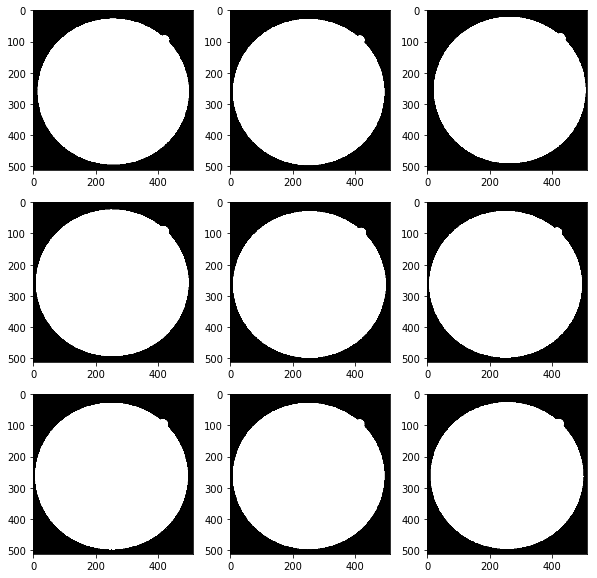

In [6]:
fig=plt.figure(figsize=(10, 10))
columns = 3
rows = 3
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(fov[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
fov = da.from_array(fov[:,:,:], chunks=(20, 512, 512))
da.to_npy_stack('/home/skyolia/JupyterProjects/data/DRIVE/test_fov', train_x, axis=0)